In [243]:
using Revise
using FUSE
using IMAS
using Plots;
FUSE.logging(Logging.Info; actors=Logging.Debug);

import IMAS: BuildLayerType, _plasma_, _gap_, _oh_, _tf_, _shield_, _blanket_, _wall_, _vessel_, _cryostat_, _divertor_
import IMAS: BuildLayerSide, _lfs_, _lhfs_, _hfs_, _in_, _out_
import IMAS: BuildLayerShape, _offset_, _negative_offset_, _convex_hull_, _princeton_D_exact_, _princeton_D_, _princeton_D_scaled_, _rectangle_, _double_ellipse_, _rectangle_ellipse_, _triple_arc_, _miller_, _square_miller_, _spline_, _silo_
import FUSE: shape_function, optimize_shape, initialize_shape_parameters, buffer, xy_polygon, rectangle_shape, convex_hull, line_through_point

using PolygonOps
using LibGEOS
using GeoInterface

In [244]:
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:FPP, version=:v2);

In [245]:
for layer in ini.build.layers
    if occursin("vacuum vessel", layer.name) || occursin("shield", layer.name) || occursin("blanket", layer.name)
        layer.shape = :rectangle_ellipse
        a=1
    end
end

ini.tf.shape = :princeton_D #_scaled

:princeton_D

In [246]:
typeof(ini.build.layers)

SimulationParameters.ParametersVector{FUSE.FUSEparameters__build_layer{Float64}}

In [247]:
FUSE.init(dd, ini, act);

[ Info: Equilibrium
[ Info:  TEQUILA


[ Info: HCD
[ Info:  ECsimple
[ Info:  ICsimple
[ Info:  LHsimple
[ Info:  NBsimple
[ Info: SteadyStateCurrent


[ Info: CXbuild
┌ Warning: optimize_shape function could not avoid polygon crossings! Perhaps try changing shape?
└ @ FUSE ~/.julia/dev/FUSE/src/physics.jl:290


2-element Vector{Float64}:
  8.61994409275351
 -0.3678919034179927

8

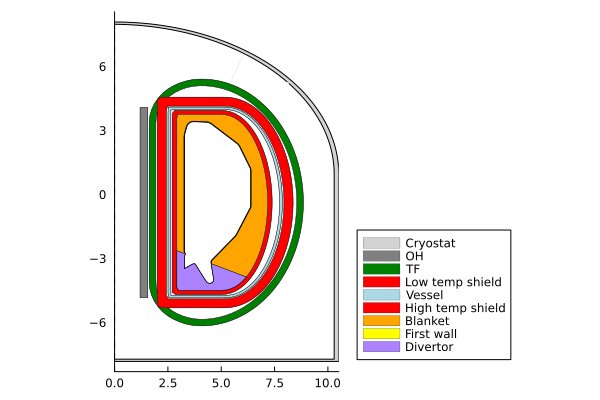

In [248]:
bd = dd.build
eqt = dd.equilibrium.time_slice[]
wall = dd.wall

layer = IMAS.get_build_layer(bd.layer; name="lfs high temp shield", type=_shield_)
display(layer.shape_parameters)
display(Int(_rectangle_ellipse_))
display(plot(bd))

#plot(bd.structure[2].outline.r,bd.structure[2].outline.z,aspect_ratio=:equal)
#plot!(bd.structure[1].outline.r,bd.structure[1].outline.z)

In [249]:
shapes = [_offset_, _negative_offset_, _convex_hull_, _princeton_D_exact_, _princeton_D_, _princeton_D_scaled_, _rectangle_, _double_ellipse_, _rectangle_ellipse_, _triple_arc_, _miller_, _square_miller_, _spline_, _silo_]

for shape in shapes
    println(shape, ": ", Int(shape))
end


_offset_: 0
_negative_offset_: 1
_convex_hull_: 2
_princeton_D_exact_: 3
_princeton_D_: 4
_princeton_D_scaled_: 5
_rectangle_: 6
_double_ellipse_: 7
_rectangle_ellipse_: 8
_triple_arc_: 9
_miller_: 10
_square_miller_: 11
_spline_: 12
_silo_: 13


11
├─ area ➡ Function [m^2]
├─ end_radius ➡ Function [m]
├─ identifier ➡ Function
├─ material ➡ "lithium-lead"
├─ name ➡ "hfs blanket"
├─ outline
│  ├─ r ➡ 101-element Vector{Float64} [m]
│  └─ z ➡ 101-element Vector{Float64} [m]
├─ shape ➡ 8
├─ shape_parameters ➡ [8.24166,-0.36772]
├─ side ➡ 1
├─ start_radius ➡ Function [m]
├─ thickness ➡ 0.335718 [m]
├─ type ➡ 4
└─ volume ➡ Function [m^3]


15
├─ area ➡ Function [m^2]
├─ end_radius ➡ Function [m]
├─ identifier ➡ Function
├─ material ➡ "lithium-lead"
├─ name ➡ "lfs blanket"
├─ outline
│  ├─ r ➡ Function [m]
│  └─ z ➡ Function [m]
├─ shape ➡ 8
├─ shape_parameters ➡ Function
├─ side ➡ -1
├─ start_radius ➡ Function [m]
├─ thickness ➡ 0.77486 [m]
├─ type ➡ 4
└─ volume ➡ Function [m^3]


11
├─ area ➡ Function [m^2]
├─ end_radius ➡ Function [m]
├─ identifier ➡ Function
├─ material ➡ "lithium-lead"
├─ name ➡ "hfs blanket"
├─ outline
│  ├─ r ➡ 290-element Vector{Float64} [m]
│  └─ z ➡ 290-element Vector{Float64} [m]
├─ shape ➡ 8
├─ shape_parameters ➡ [8.24166,-0.36772]
├─ side ➡ 1
├─ start_radius ➡ Function [m]
├─ thickness ➡ 0.335718 [m]
├─ type ➡ 4
└─ volume ➡ Function [m^3]


15
├─ area ➡ Function [m^2]
├─ end_radius ➡ Function [m]
├─ identifier ➡ Function
├─ material ➡ "lithium-lead"
├─ name ➡ "lfs blanket"
├─ outline
│  ├─ r ➡ 204-element Vector{Float64} [m]
│  └─ z ➡ 204-element Vector{Float64} [m]
├─ shape ➡ 8
├─ shape_parameters ➡ Function
├─ side ➡ -1
├─ start_radius ➡ Function [m]
├─ thickness ➡ 0.77486 [m]
├─ type ➡ 4
└─ volume ➡ Function [m^3]


┌ Warning: optimize_shape function could not avoid polygon crossings! Perhaps try changing shape?
└ @ FUSE ~/.julia/dev/FUSE/src/physics.jl:290


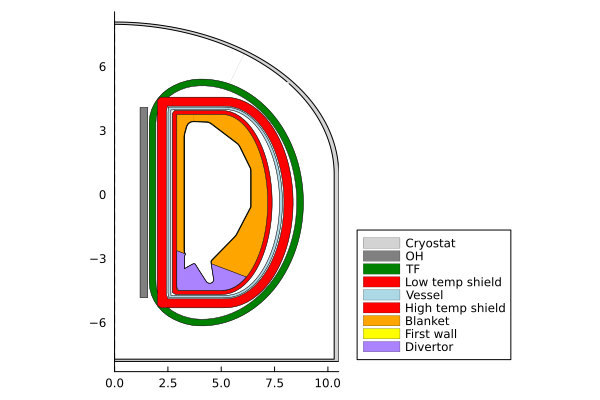

In [250]:
hfs_blanket = IMAS.get_build_layer(bd.layer; type=_blanket_, fs=_hfs_)
hfs_blanket_shape = BuildLayerShape(mod(mod(hfs_blanket.shape, 1000), 100))
lfs_blanket = IMAS.get_build_layer(bd.layer; type=_blanket_, fs=_lfs_)
lfs_blanket_shape = BuildLayerShape(mod(mod(lfs_blanket.shape, 1000), 100))


display(hfs_blanket)
display(lfs_blanket)

shape_index = Int(_rectangle_ellipse_)
layer_shape = BuildLayerShape(shape_index)

k = 11
hfs_blanket.shape, layer.shape_parameters = optimize_shape(bd, k + 1, k, layer_shape)
k = 15
lfs_blanket.shape, layer.shape_parameters = optimize_shape(bd, k + 1, k, layer_shape)


IMAS.resample_2d_path(hfs_blanket)
IMAS.resample_2d_path(lfs_blanket)
display(hfs_blanket)
display(lfs_blanket)

plot(bd)
